<a href="https://colab.research.google.com/github/Sreeyakrishna/Cardiovascular-Disease-Prediction/blob/main/Cardiovascular_Disease_Detection_A_Machine_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Data Preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("cardio_train (1).csv", sep=";")  # note: dataset is semicolon separated

print(df.head())
print(df.info())
print(df.isnull().sum())

df = df.drop_duplicates()

X = df.drop("cardio", axis=1)   # features
y = df["cardio"]                # target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4

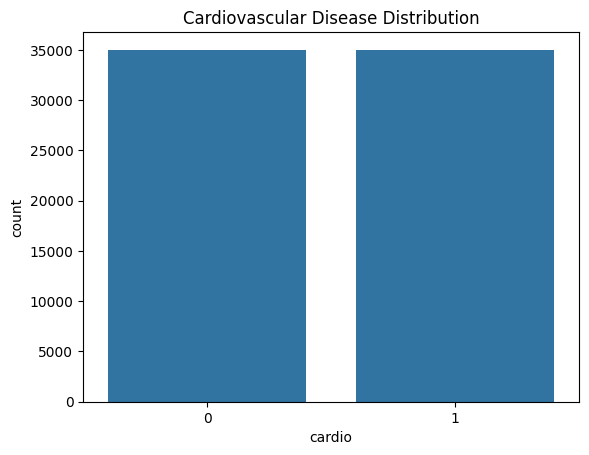

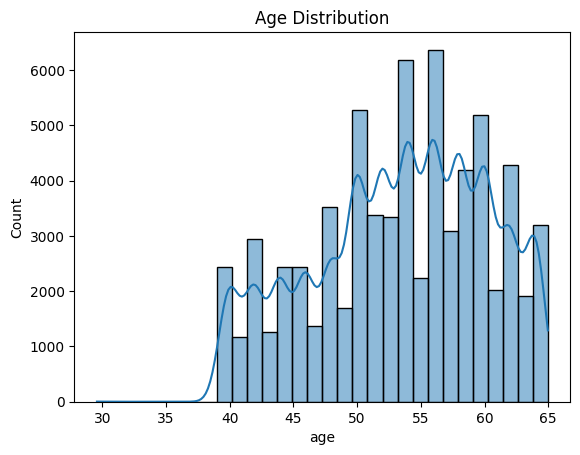

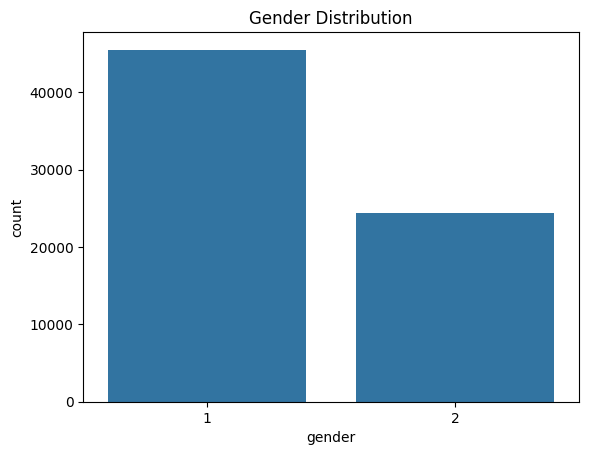

In [5]:
#EDA Univariate plots
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target
sns.countplot(x=y)
plt.title("Cardiovascular Disease Distribution")
plt.show()

# Example: Age distribution
sns.histplot(df['age'] / 365, bins=30, kde=True)  # converting days → years
plt.title("Age Distribution")
plt.show()

# Example: Gender count
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()


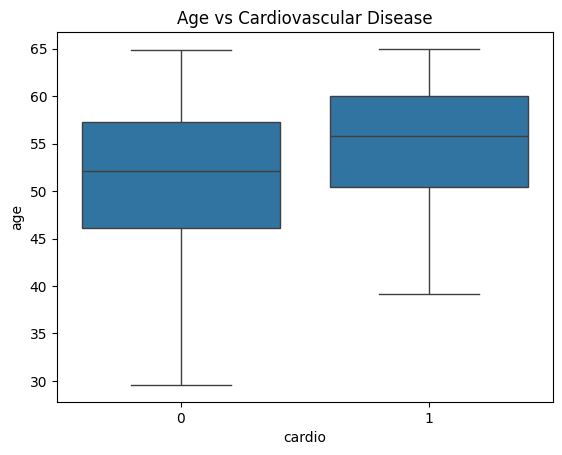

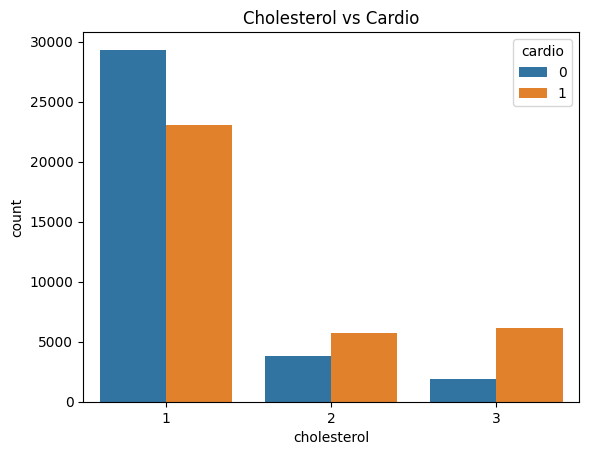

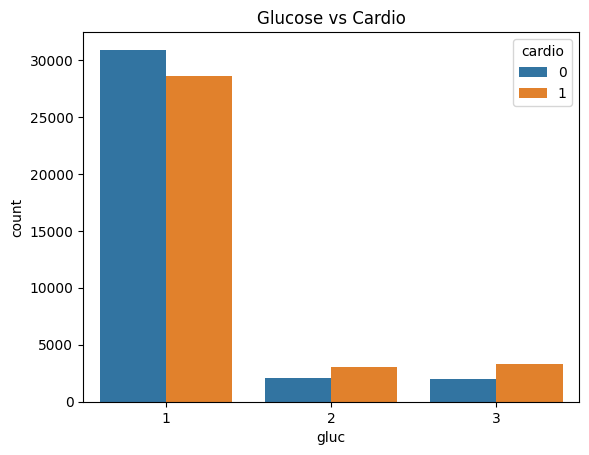

In [6]:
#EDA bivariate or comparisons
# Compare Age vs Cardio
sns.boxplot(x='cardio', y=df['age']/365, data=df)
plt.title("Age vs Cardiovascular Disease")
plt.show()

# Compare cholesterol levels
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title("Cholesterol vs Cardio")
plt.show()

# Compare glucose
sns.countplot(x='gluc', hue='cardio', data=df)
plt.title("Glucose vs Cardio")
plt.show()


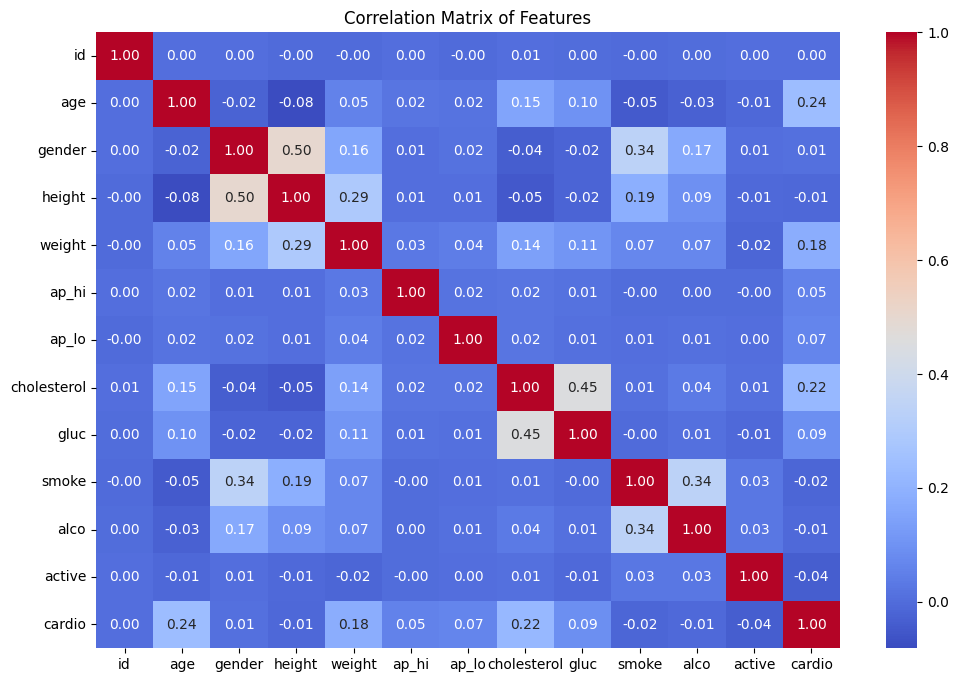

In [7]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("DT Accuracy:", accuracy_score(y_test, y_pred_dt))

LR Accuracy: 0.7138571428571429
[[5273 1731]
 [2275 4721]]
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000

SVM Accuracy: 0.7255
DT Accuracy: 0.6332857142857143


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))


KNN Accuracy: 0.6296428571428572
RF Accuracy: 0.7231428571428572


In [11]:
results = {
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "KNN", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf),
    ]
}
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0  Logistic Regression  0.713857
1                  SVM  0.725500
2        Decision Tree  0.633286
3                  KNN  0.629643
4        Random Forest  0.723143
